<a href="https://colab.research.google.com/github/subha9542/Datamining/blob/master/Datamining_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
 
X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
#X = np.array([[12,39],[20,36],[28,30],[18,52],[29,54],[33,46],[24,55],[45,59],[45,63],[52,70],[55,58]])
 
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=3):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
 
    def fit(self,data):        
        #self.centroids = {}
 
        #for i in range(self.k):
        #    self.centroids[i] = data[i]
        self.centroids = {0:[8, 4], 1: [5, 8],2:[1, 2]}
        #self.centroids = {0:[7, 4.333333], 1: [3.6666, 9],2:[1.5, 3.5]}
        for i in range(self.max_iter):
            print(self.centroids)
            self.classifications = {}
 
            for i in range(self.k):
                self.classifications[i] = []
 
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
 
            prev_centroids = dict(self.centroids)
 
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
              
            #print(self.classifications)
 
 
 
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
 
clf = K_Means()
clf.fit(X)

{0: [8, 4], 1: [5, 8], 2: [1, 2]}
{0: array([7.        , 4.33333333]), 1: array([3.66666667, 9.        ]), 2: array([1.5, 3.5])}
{0: array([7.        , 4.33333333]), 1: array([3.66666667, 9.        ]), 2: array([1.5, 3.5])}


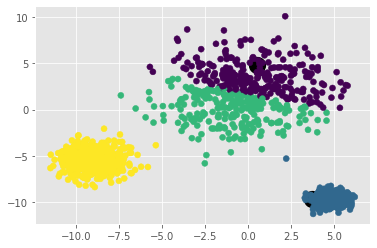

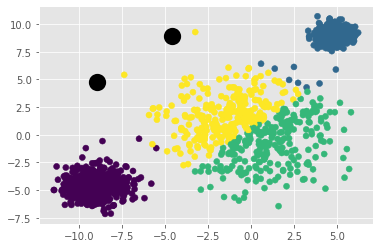

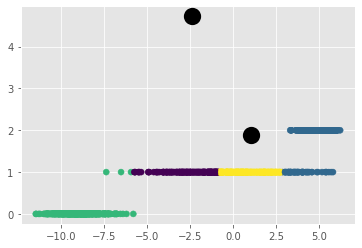

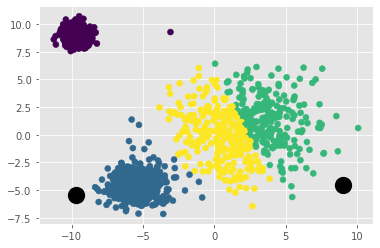

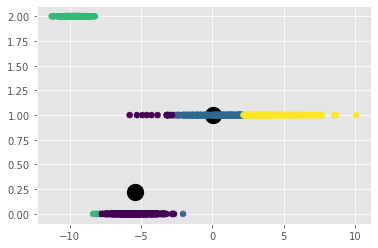

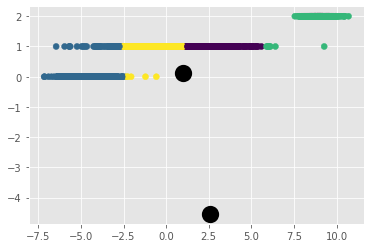

In [ ]:
import itertools
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

df = pd.read_csv('hwk08.csv')
colors = 10*["g","r","c","b","k"]

all = itertools.combinations(['A','B','C','D'], 2)
#print(list(all))

for pairs in list(all):
    pairs = list(pairs)
    for k in range(2,5):
        #print('Columns: ',pairs)
        #print('Clusters: ', k)
        kmeans = KMeans(n_clusters=k)
        fit = kmeans.fit_predict(df[pairs])
        labels = kmeans.predict(df[pairs])
        centroids = kmeans.cluster_centers_
        #print(centroids)
        
    plt.scatter(centroids[0], centroids[1], marker="o", color="k", s=150, linewidths=5)
    plt.scatter(df[pairs[0]],df[pairs[1]],c = fit)
    plt.show()
        #for classification in clf.classifications:
        #    color = colors[classification]
        #    for featureset in clf.classifications[classification]:
        #        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)